# youtube analysis project
# exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('train.csv')
df.head(5)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


In [4]:
df.shape

(3198, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3192 non-null   object 
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags                   3046 non-null   object 
 6   description            3133 non-null   object 
 7   Trend_day_count        3197 non-null   float64
 8   Tag_count              3197 non-null   object 
 9   Trend_tag_count        3197 non-null   object 
 10  comment_count          3198 non-null   object 
 11  comment_disabled       3198 non-null   object 
 12  like dislike disabled  3198 non-null   object 
 13  likes                  3198 non-null   object 
 14  dislike                3198 non-null   object 
 15  tag 

In [6]:
df.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title      object
views                     object
Unnamed: 17              float64
Unnamed: 18               object
dtype: object

In [7]:
df.isnull().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

In [8]:
df.drop(['Unnamed: 17','Unnamed: 18'],axis=1,inplace=True)

In [9]:
subs=df['subscriber'].median()                                      #replacing the float value with median
df['subscriber'].replace(np.nan,subs,inplace=True)

In [10]:
medianval=df['Trend_day_count'].median()
df['Trend_day_count'].replace(np.nan,medianval,inplace=True)

In [11]:
mode1=df['title'].mode().values[0]
df['title']=df['title'].replace(np.nan,mode1)

In [12]:
df.isnull().sum()

Video_id                   0
category_id                6
channel_title              3
subscriber                 0
title                      0
tags                     152
description               65
Trend_day_count            0
Tag_count                  1
Trend_tag_count            1
comment_count              0
comment_disabled           0
like dislike disabled      0
likes                      0
dislike                    0
tag appered in title       1
views                      0
dtype: int64

In [13]:
mode2=df['Tag_count'].mode().values[0]                            #replacing the null values with mode
df['Tag_count']=df['Tag_count'].replace(np.nan,mode2)

In [14]:
mode3=df['Trend_day_count'].mode().values[0]                                           #replacing catogorical values
df['Trend_day_count']=df['Trend_day_count'].replace(np.nan,mode3)

In [15]:
mode4=df['Trend_tag_count'].mode().values[0]
df['Trend_tag_count']=df['Trend_tag_count'].replace(np.nan,mode4)

In [16]:
mode5=df['tag appered in title'].mode().values[0]
df['tag appered in title']=df['tag appered in title'].replace(np.nan,mode5)

In [17]:
df['description'].fillna('NoDescription', inplace=True)        #replacing the null values with a common value

In [18]:
df['tags'].fillna('NoTags',inplace=True)

In [19]:
df = df.dropna(axis=0, subset=['channel_title'])            #droping the row that are having null values

In [20]:
df = df.dropna(axis=0, subset=['category_id'])

In [21]:
df.isnull().sum()

Video_id                 0
category_id              0
channel_title            0
subscriber               0
title                    0
tags                     0
description              0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     0
views                    0
dtype: int64

In [22]:
df.shape

(3189, 17)

<AxesSubplot:>

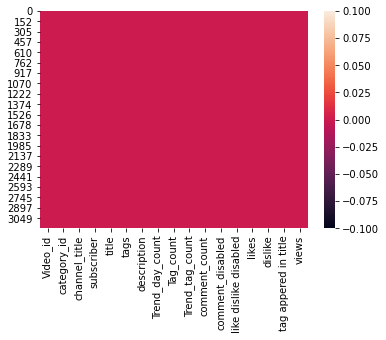

In [23]:
sns.heatmap(df.isnull())

#now there is no null values

In [24]:
df.describe(include='all')

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
count,3189,3189,3189,3.189000e+03,3189,3189,3189,3189.000000,3189,3189,3189,3189,3189,3189,3189,3189,3189
unique,3189,16,1499,NaN,3182,2939,3089,NaN,22,10,2169,3,3,2204,2151,2,3185
top,XMO92WID64,24,Refinery29,NaN,Justice League - Movie Review,NoTags,NoDescription,NaN,24,6,,TRUE,FALSE,0,0,True,932496
freq,1,785,34,NaN,5,151,65,NaN,218,474,1011,2177,2348,840,841,2104,2
mean,NaN,NaN,NaN,3.807231e+06,NaN,NaN,NaN,7.966447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.859473e+07,NaN,NaN,NaN,78.654310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.428800e+05,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.241220e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.808198e+06,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]                       #no duplicate values

0


,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views


In [26]:
df.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title        bool
views                     object
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 3197
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3189 non-null   object 
 1   category_id            3189 non-null   object 
 2   channel_title          3189 non-null   object 
 3   subscriber             3189 non-null   float64
 4   title                  3189 non-null   object 
 5   tags                   3189 non-null   object 
 6   description            3189 non-null   object 
 7   Trend_day_count        3189 non-null   float64
 8   Tag_count              3189 non-null   object 
 9   Trend_tag_count        3189 non-null   object 
 10  comment_count          3189 non-null   object 
 11  comment_disabled       3189 non-null   object 
 12  like dislike disabled  3189 non-null   object 
 13  likes                  3189 non-null   object 
 14  dislike                3189 non-null   object 
 15  tag 

In [28]:
v=df.loc[2421]
v

Video_id                                        WWW33ANN88
category_id                                             22
channel_title                        In Case You Missed It
subscriber                                       1241220.0
title                    Agents of SHIELD 5x06 Final Scene
tags                                                NoTags
description                                  NoDescription
Trend_day_count                                       12.0
Tag_count                                               12
Trend_tag_count                                          6
comment_count                                             
comment_disabled                                     FALSE
like dislike disabled                                FALSE
likes                                                 3690
dislike                                               3029
tag appered in title                                 False
views                                              #VALU

In [29]:
df = df.drop(labels=2421, axis=0)


In [30]:
df.shape

(3188, 17)

In [31]:
df['views']=df['views'].astype(int)

In [32]:
df.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title        bool
views                      int32
dtype: object

<AxesSubplot:>

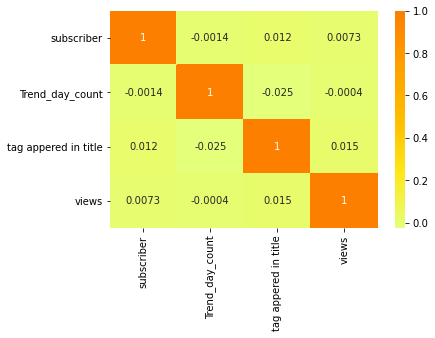

In [33]:
sns.heatmap(df.corr(),cmap='Wistia',annot=True)

In [34]:
df.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title        bool
views                      int32
dtype: object

In [35]:
c=df.loc[1234]
c

Video_id                                                        UWD30QGq88
category_id                                                             26
channel_title                                                Alissa Ashley
subscriber                                                       1173240.0
title                                        Justice League - Movie Review
tags                                                                NoTags
description                                                              ’
Trend_day_count                                                        7.0
Tag_count                alissa ashley|alissa ashley makeup|hooded eye ...
Trend_tag_count          Hey guys! To get in the holiday spirit, I crea...
comment_count                                                           10
comment_disabled                                                        25
like dislike disabled                                                    4
likes                    

In [36]:
df=df.drop(labels=1234,axis=0)

In [37]:
df.shape

(3187, 17)

In [38]:
df['likes']=df['likes'].astype(int)

In [39]:
df['dislike']=df['dislike'].astype(int)

In [40]:
df['like dislike disabled']=df['like dislike disabled'].astype(bool)

In [41]:
df['comment_disabled']=df['comment_disabled'].astype(bool)

In [42]:
df['Tag_count']=df['Tag_count'].astype(int)

In [43]:
df['comment_count']=df['comment_count'].replace(" ",0)

In [44]:
df['comment_count'].isnull().sum()

0

In [45]:
df['comment_count'].head(20)

0          0
1     116266
2     257850
3     263939
4     268085
5     198248
6          0
7     103280
8     214583
9     223434
10    267443
11    210007
12    247944
13    106826
14         0
15         0
16         0
17    266360
18     60320
19    161132
Name: comment_count, dtype: object

In [46]:
df['comment_count']=df['comment_count'].astype(int)

In [47]:
df.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                  int32
Trend_tag_count           object
comment_count              int32
comment_disabled            bool
like dislike disabled       bool
likes                      int32
dislike                    int32
tag appered in title        bool
views                      int32
dtype: object

<AxesSubplot:>

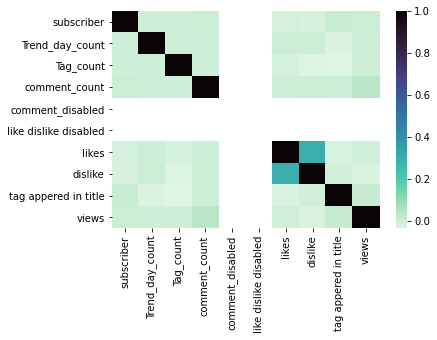

In [48]:
sns.heatmap(df.corr(),cmap='mako_r')

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='likes', ylabel='Density'>

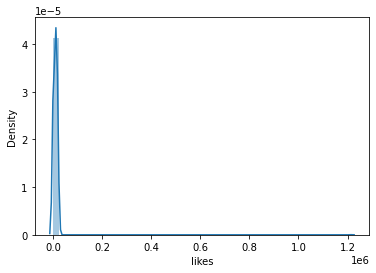

In [49]:
sns.distplot(df['likes'])

In [51]:
df.describe()

,subscriber,Trend_day_count,Tag_count,comment_count,likes,dislike,views
count,3.187000e+03,3187.000000,3187.000000,3187.000000,3.187000e+03,3187.000000,3.187000e+03
mean,3.808862e+06,7.965485,18.634766,112623.184186,9.770372e+03,5785.097270,1.574244e+06
std,2.860363e+07,78.678959,80.491988,101857.792005,2.243799e+04,4861.169937,2.057064e+07
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00
25%,2.428800e+05,4.000000,12.000000,0.000000,0.000000e+00,0.000000,4.304685e+05
50%,1.241220e+06,7.000000,17.000000,99856.000000,1.022700e+04,5354.000000,7.086220e+05
75%,3.808198e+06,10.000000,21.000000,203279.000000,1.505600e+04,10038.500000,1.204540e+06
max,1.576229e+09,4444.000000,3225.000000,299877.000000,1.213628e+06,14858.000000,9.898735e+08


In [73]:
df.Trend_day_count.describe()

count    3187.000000
mean        7.965485
std        78.678959
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max      4444.000000
Name: Trend_day_count, dtype: float64

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comment_count', ylabel='Density'>

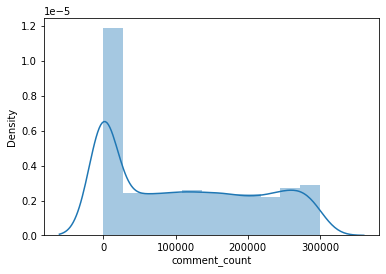

In [83]:
sns.distplot(df['comment_count'])

In [76]:
df.likes.describe()

count    3.187000e+03
mean     9.770372e+03
std      2.243799e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.022700e+04
75%      1.505600e+04
max      1.213628e+06
Name: likes, dtype: float64

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trend_day_count', ylabel='Density'>

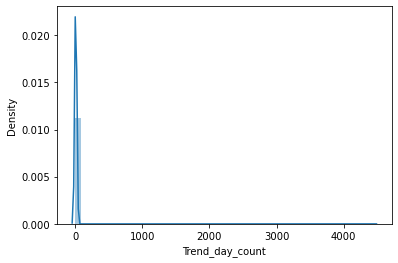

In [85]:
sns.distplot(df['Trend_day_count'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='likes'>

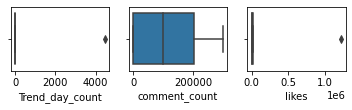

In [72]:
## checking outliers

plt.subplot(3,3,1)
sns.boxplot('Trend_day_count',data=df)     #outlier exists

plt.subplot(3,3,2)
sns.boxplot('comment_count',data=df)   #uniformly distributed
plt.subplot(3,3,3)
sns.boxplot('likes',data=df)   #outliers exist


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dislike', ylabel='Density'>

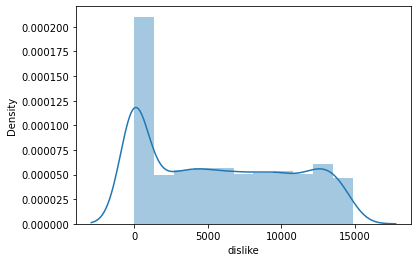

In [80]:
sns.distplot(df['dislike'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tag_count', ylabel='Density'>

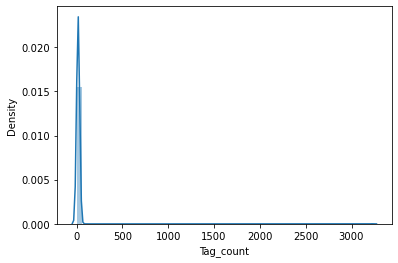

In [82]:
sns.distplot(df['Tag_count'])

In [79]:
df.Tag_count.describe()

count    3187.000000
mean       18.634766
std        80.491988
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max      3225.000000
Name: Tag_count, dtype: float64

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tag_count'>

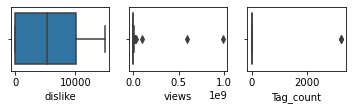

In [71]:
plt.subplot(3,3,1)
sns.boxplot('dislike',data=df)      #uniformly distributed
plt.subplot(3,3,2)
sns.boxplot('views',data=df)    #large number of outliers
plt.subplot(3,3,3)
sns.boxplot('Tag_count',data=df)      #outliers present

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

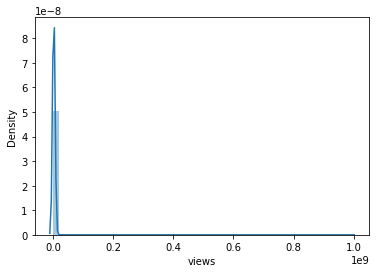

In [64]:
sns.distplot(df['views'])

In [86]:
skewval=df.skew(axis=0)
skewval
## In the columns 'comment_disabled' and 'like dislike disabled' the data are perfectly  distributed with no skew values

category_id              -1.320114
subscriber               52.339075
Trend_day_count          56.290477
Tag_count                39.648321
comment_count             0.325633
comment_disabled          0.000000
like dislike disabled     0.000000
likes                    48.499853
dislike                   0.242779
tag appered in title     -0.676695
views                    42.551122
dtype: float64

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


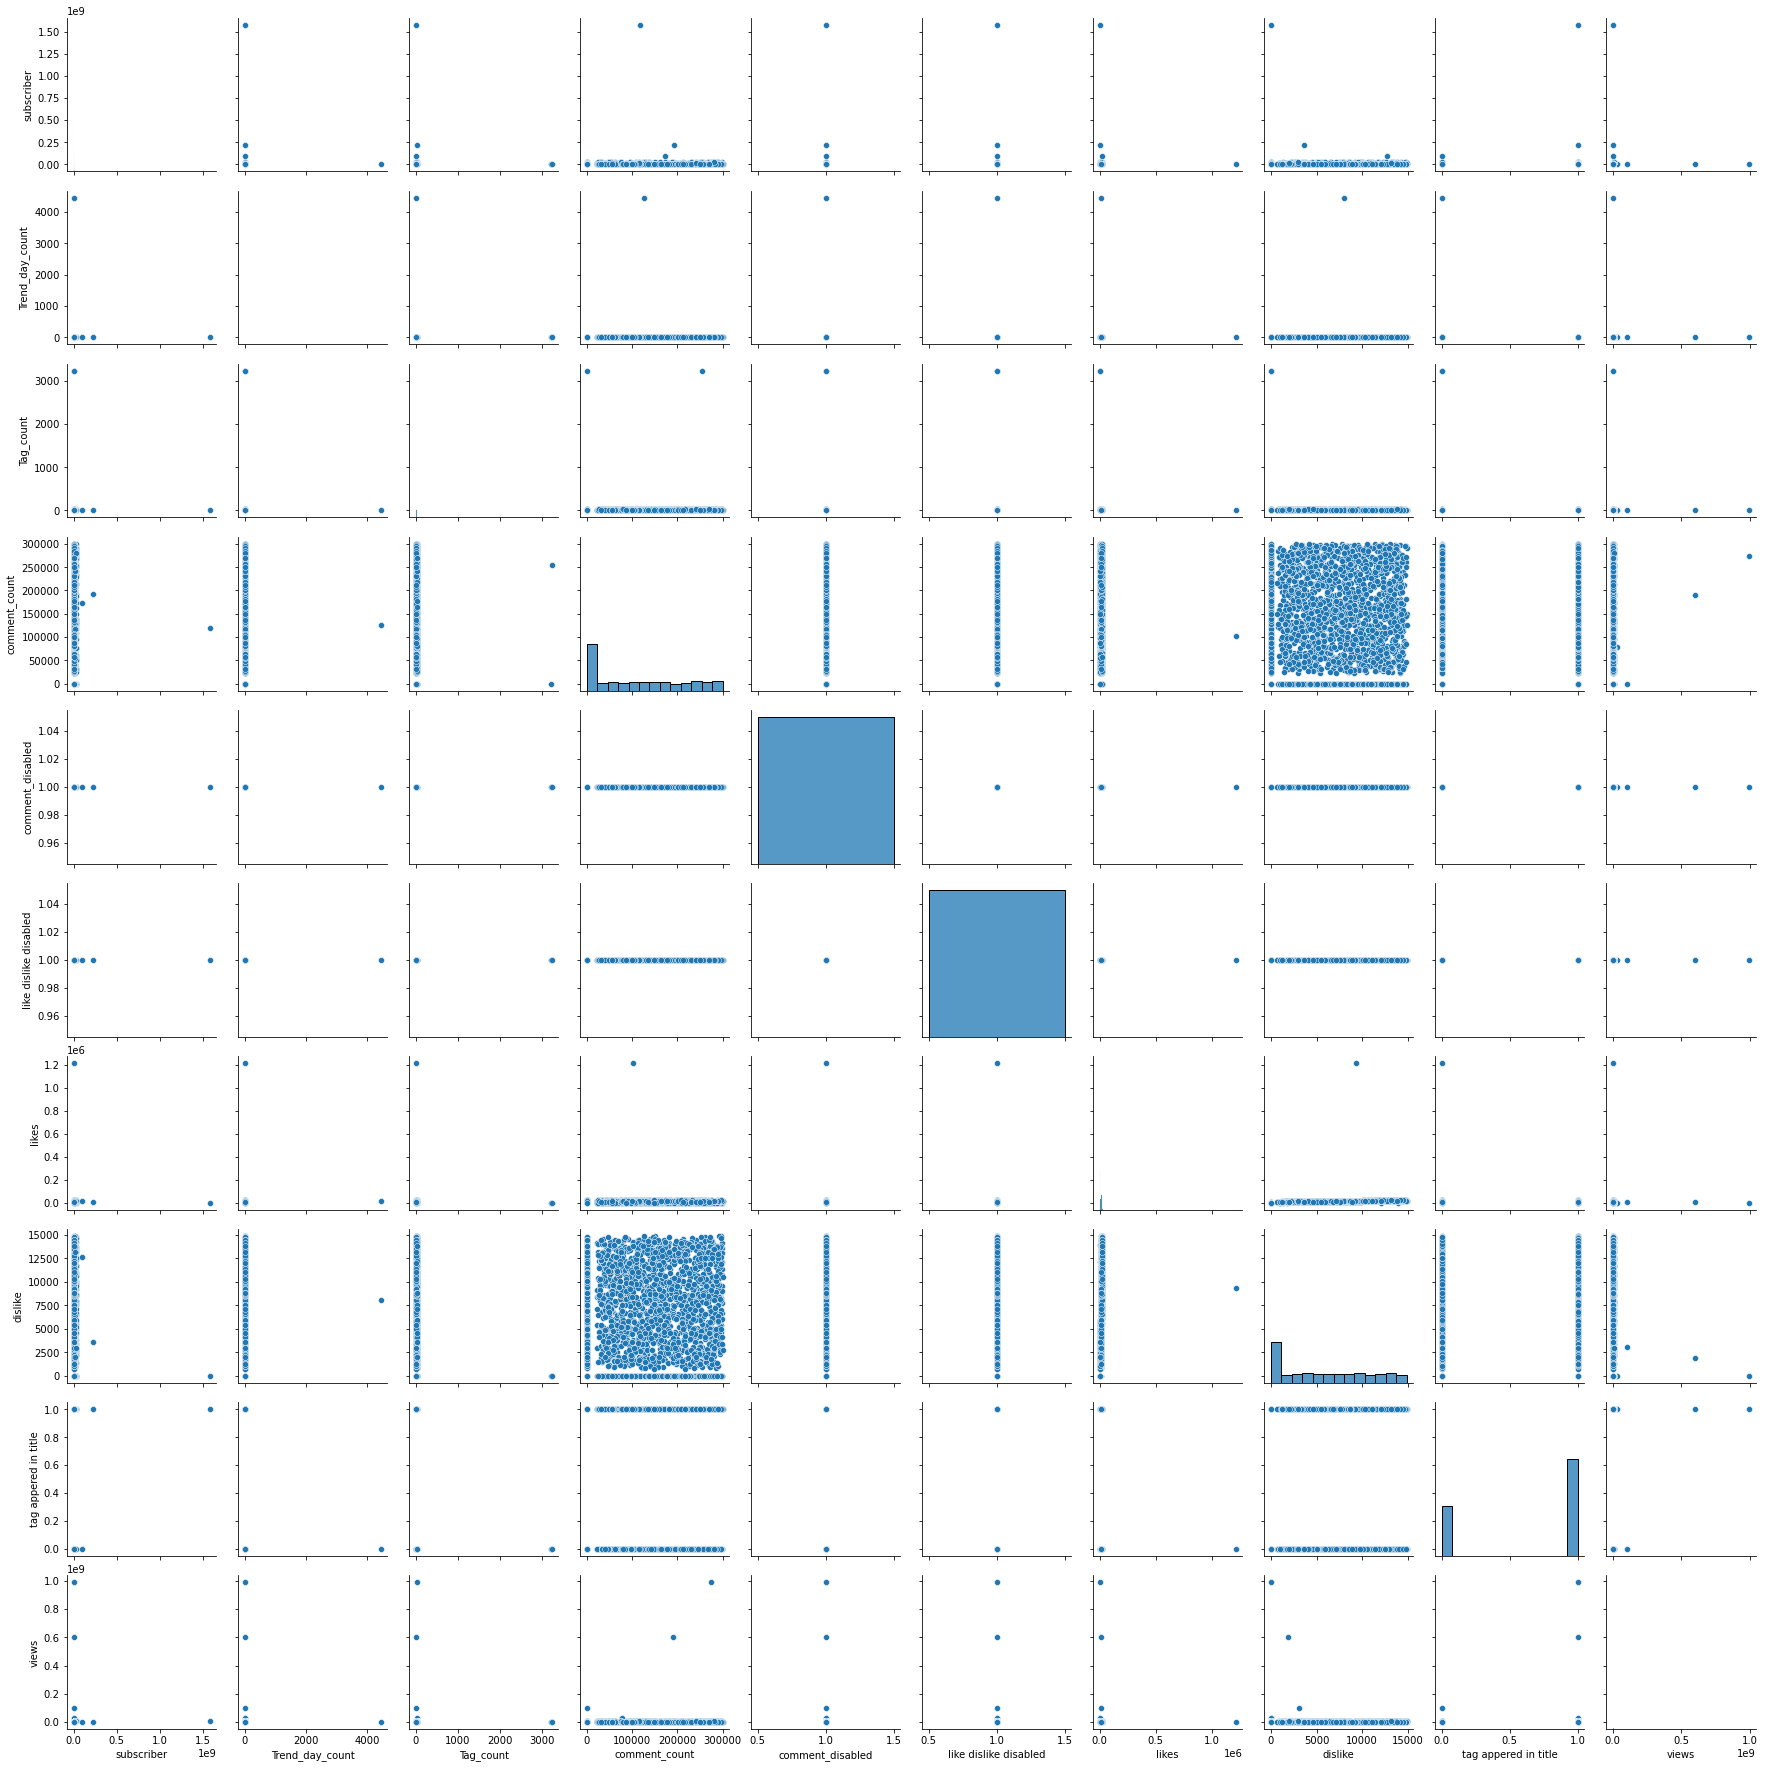

In [87]:
sns.pairplot(df)